# Shopify Data Science Challenge

`Submission by Parth Dilip Maniar`

officialparthmaniar@gmail.com


https://www.linkedin.com/in/parthdmaniar/

**Question 1:** Given some sample data, write a program to answer the following: [click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?

In [10]:
import pandas as pd
import os
raw_data = pd.read_csv(os.path.join(os.getcwd(), '2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'))

In [13]:
data = raw_data
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From looking at the above descriptive statistics of the data, we can see that while the average order amount is \$3,145.13, there is a heavy skew to a larger order amount by some relatively large values (e.g. the max order amount is \$704,000.00, but the third quartile order amount is only \$390.00). For a better look at the 'typical' shoe shop, we could look at the median order value, which is \$284.00. This is a better metric to use as it eliminates the outliars. Although, it is important to understand why there are outliars, since they may be important to factor into our analysis.

There are two factors that contribute to the order amount (numerically):<br>
1. Number of shoes ordered (total_items) <br>
2. Individual shoe price (order_amount / total_items)


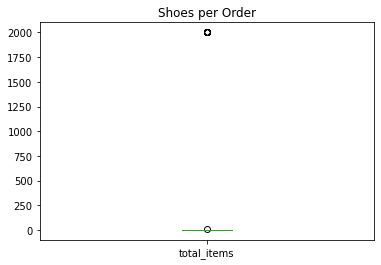

In [14]:
data.total_items.plot(kind='box', title='Shoes per Order')

It appears there are some shops completing bulk orders. Since we can see most of the data is well under at least 250 shoes per order. Let's see what the distribution is without these bulk orders:

Non-bulk orders:  99.66 % of total orders


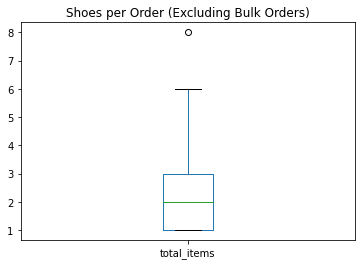

In [15]:
print("Non-bulk orders: ", round(data[data.total_items < 250].order_id.count() / data.order_id.count() * 100, 2), "% of total orders")
data[data.total_items < 250].total_items.plot(kind='box', title='Shoes per Order (Excluding Bulk Orders)')

Much better. We can see that the bulk orders only make up only 0.34% of the orders, and most of the orders have less than 9 shoes per order. Let's look at the cost of the shoes that are being sold.

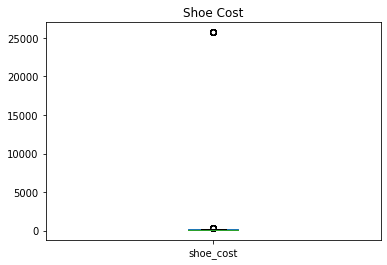

In [17]:
data["shoe_cost"] = data.order_amount / data.total_items
data.shoe_cost.plot(kind='box', title="Shoe Cost")

Again, we have a single major outliar. Let's remove these 'ultra premium' shoes and see what the distribution looks like:

Non-ultra-premium shoes:  99.08 % of total orders


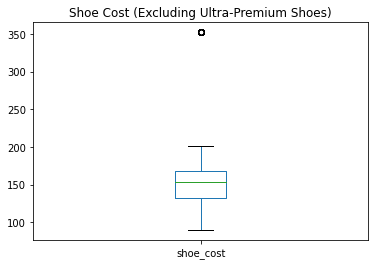

In [20]:
print("Non-ultra-premium shoes: ", round(data[data.shoe_cost < 1000].order_id.count() / data.order_id.count() * 100, 2), "% of total orders")
data.shoe_cost[data.shoe_cost < 5000].plot(kind='box', title="Shoe Cost (Excluding Ultra-Premium Shoes)")

All of the data now seems to fall within what we would reasonably expect a shoe to cost; ~\$100 - \$350<br>
So lets see what this data looks like when we exclude the bulk orders (item counts >= 100) and the ultra-premium shoes (shoe price >= $1000):

In [21]:
filtered_data = data[(data.shoe_cost < 1000) & (data.total_items < 10)]
filtered_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,shoe_cost
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


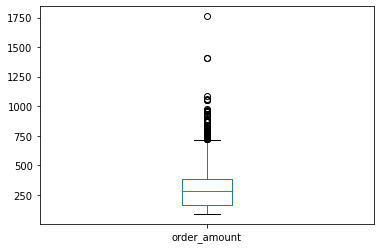

In [22]:
filtered_data.order_amount.plot(kind='box')

This gives us an average order value of \$302.58, much more inline with the expectation that shoes are a relatively inexpensive item. While the median of the original data set ($284.00) hasn't changed. When we look at the average unit price of shoes sold on Shopify (excluding ultra premium shoes):



In [23]:
round(filtered_data.groupby('shop_id').shoe_cost.mean().mean(), 2)

152.26

This, coupled with the fact that the average number of shoes in an order (excluding bulk orders) sits at ~2 shoes. We would expect the typical business to be making just over $300/order.
The average order value, after filtering out the outliars (bulk orders and ultra-premium shoe retailers), would be the best metric to analyis the data. This allows one to predict how new business will do as it is a

> **Average 'typical' Order Value for a Shopify shoe shop: ~$302.58**

In this specific case, depending on the expected use of this analysis, the difference between the median and filtered average is small enough it may not make a significant difference practically.

----------------------

**Question 2:** For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total? 

> **54**

```
SELECT COUNT(o.OrderID) 
FROM Orders as o 
    JOIN Shippers as s ON o.ShipperID = s.ShipperID
WHERE s.ShipperName = 'Speedy Express'
```

b. What is the last name of the employee with the most orders? 
> **Peacock**

```
SELECT LastName
FROM Employees
WHERE EmployeeID = (
        SELECT EmployeeID
        FROM Orders
        GROUP BY EmployeeID
        ORDER BY COUNT(OrderID) DESC
        LIMIT 1)
```

c. What product was ordered the most by customers in Germany? 
> **Boston Crab Meat**

```
SELECT p.ProductName
FROM (
        SELECT OrderID
        FROM Orders AS o
            JOIN Customers AS c ON c.CustomerID = o.CustomerID
        WHERE c.Country = 'Germany'
    ) AS gOrd
    JOIN OrderDetails AS d ON gOrd.OrderID = d.OrderID
    JOIN Products AS p ON d.ProductID = p.ProductID
GROUP BY p.ProductID
ORDER BY SUM(d.Quantity) DESC
LIMIT 1
```